## xcube Local Data Cube Generator

This notebook provides a walk-through demonstrating how to use the _local data cube generator_.

An introduction to the xcube data cube generators can be found in the [Getting Started](./1_getting_started.ipynb) Notebook.

In [1]:
from xcube.core.gen2 import LocalCubeGenerator
from xcube.core.gen2 import CubeGeneratorRequest

The first example represents a simple conversion from a local NetCDF dataset (`input_config`) into a
local Zarr dataset (`output_config`). As we only want a copy we do not want to specify any target 
cube parameters (`cube_config`).

This is how a _cube generator request_ looks as a (JSON) dictionary:

In [2]:
request_json = {
    "input_config": {
        "store_id": "directory",
        "store_params": {
            "base_dir": "../../serve/demo"
        },
        "data_id": "cube.nc"
    },
    "cube_config": {
        
    },
    "output_config": {
        "store_id": "directory",
        "store_params": {
            "base_dir": "."
        },
        "replace": True,
        "data_id": "cube.zarr"
    }
}

Validate `request_json` and convert into a `CubeGeneratorRequest` object:

In [3]:
request = CubeGeneratorRequest.from_dict(request_json)
request

Instantiate the generator object:

In [4]:
gen = LocalCubeGenerator(request)

Get some information about the cube that would be generated by `gen`:

In [5]:
cube_info = gen.get_cube_info()
cube_info

Now perform the actual cube generation:

In [6]:
cube_id = gen.generate_cube()
cube_id

'cube.zarr'

Let's open the generated cube:

In [7]:
import xarray as xr
cube = xr.open_zarr(cube_id)
cube

<xarray.Dataset>
Dimensions:        (bnds: 2, lat: 1000, lon: 2000, time: 5)
Coordinates:
  * lat            (lat) float64 52.5 52.5 52.49 52.49 ... 50.01 50.01 50.0 50.0
    lat_bnds       (lat, bnds) float64 dask.array<chunksize=(1000, 2), meta=np.ndarray>
  * lon            (lon) float64 0.00125 0.00375 0.00625 ... 4.994 4.996 4.999
    lon_bnds       (lon, bnds) float64 dask.array<chunksize=(2000, 2), meta=np.ndarray>
  * time           (time) datetime64[ns] 2017-01-16T10:09:21.834255872 ... 20...
    time_bnds      (time, bnds) datetime64[ns] dask.array<chunksize=(5, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    c2rcc_flags    (time, lat, lon) float64 dask.array<chunksize=(5, 1000, 2000), meta=np.ndarray>
    conc_chl       (time, lat, lon) float64 dask.array<chunksize=(5, 1000, 2000), meta=np.ndarray>
    conc_tsm       (time, lat, lon) float64 dask.array<chunksize=(5, 1000, 2000), meta=np.ndarray>
    kd489          (time, lat, lon) float64 dask.array<chunksize=(5, 1000, 2000), meta=np.ndarray>
    quality_flags  (time, lat, lon) float64 dask.array<chunksize=(5, 1000, 2000), meta=np.ndarray>
Attributes:
    Conventions:           CF-1.6
    TileSize:              128:1190
    auto_grouping:         iop:conc:rtoa:rrs:rhown:kd:unc
    metadata_profile:      beam
    metadata_version:      0.5
    product_type:          C2RCC_OLCI
    start_date:            16-JAN-2017 10:09:05.396603
    stop_date:             16-JAN-2017 10:09:38.271909
    tiepoint_coordinates:  TP_longitude TP_latitude

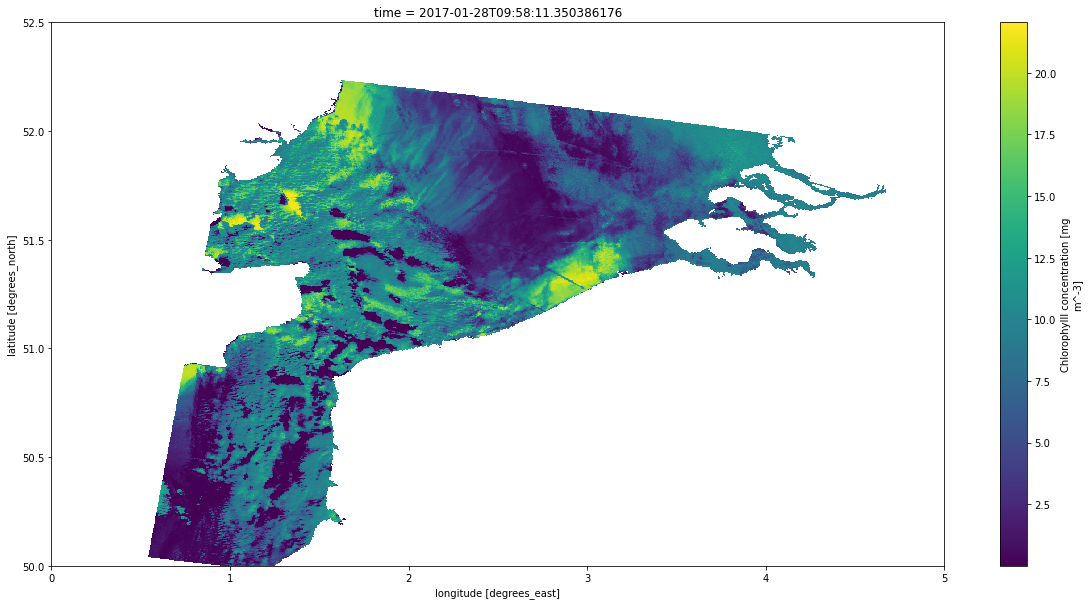

In [8]:
cube.conc_chl.isel(time=3).plot.imshow(figsize=(20, 10))

_This is a work in progress. More material will follow in an upcoming xcube release._